In [1]:
import re
import numpy as np
import pandas as pd

import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from nltk.stem import WordNetLemmatizer

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
# Importing the dataset
DATASET_COLUMNS=['ids','label','tweet']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('/content/tweets (1).csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(5)

,ids,label,tweet
1246,1246,0,Goodnight #Selfie #Me #Boy #Inked #Bed #Laterg...
7142,7142,0,All in a days work . #work #like #a #champion ...
2998,2998,0,@ameliafsimmons Oh it's stressing me out. Beli...
2059,2059,0,18 years old papa. #samsung #live #laugh #life...
7070,7070,0,Early xmas present @missssgladiesss #tmobile #...


In [5]:
df.head()


,ids,label,tweet
0,id,label,tweet
1,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
2,2,0,Finally a transparant silicon case ^^ Thanks t...
3,3,0,We love this! Would you go? #talk #makememorie...
4,4,0,I'm wired I know I'm George I was made that wa...


In [6]:
df.columns

Index(['ids', 'label', 'tweet'], dtype='object')

In [7]:
print('length of data is', len(df))

length of data is 7921


In [8]:
df. shape

(7921, 3)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7921 entries, 0 to 7920
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ids     7921 non-null   object
 1   label   7921 non-null   object
 2   tweet   7921 non-null   object
dtypes: object(3)
memory usage: 185.8+ KB


In [10]:
df.dtypes

ids      object
label    object
tweet    object
dtype: object

In [11]:
np.sum(df.isnull().any(axis=1))

0

In [12]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   3
Count of rows in the data is:   7921


In [20]:
df['label'].unique()

array(['label', '0', '1'], dtype=object)

In [25]:
df['label'].nunique()

3

TypeError: ignored

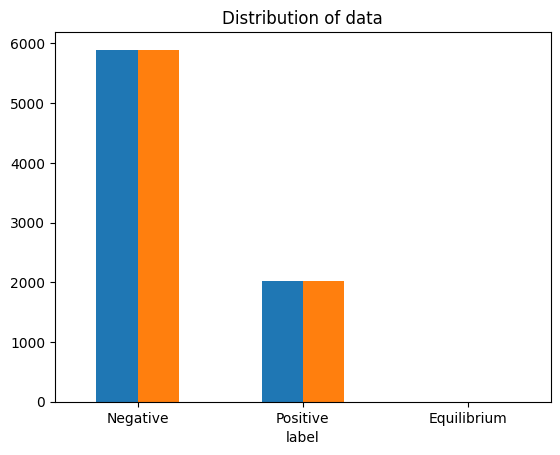

In [32]:
# Plotting the distribution for dataset.
ax = df.groupby('label').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive', 'Equilibrium'], rotation=0)
# Storing data in lists.
tweet, sentiment, ids = list(df['tweet']), list(df['label'], list(df['ids']))

<Axes: xlabel='label', ylabel='count'>

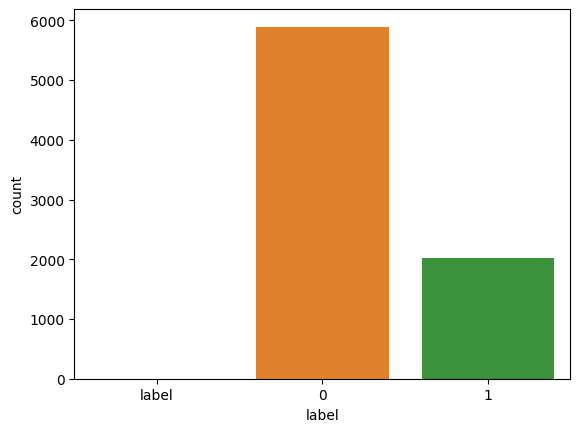

In [29]:
import seaborn as sns
sns.countplot(x='label', data=df)

In [31]:
data=df[['tweet','label']]

In [ ]:
data['label'] = data['label'].replace(4,1)

In [34]:
data['label'].unique()

array(['label', '0', '1'], dtype=object)

In [35]:
data_pos = data[data['label'] == 1]
data_neg = data[data['label'] == -1]
data_eqi = data[data['label'] == 0 ]

In [36]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]
data_eqi = data_eqi.iloc[:int(20000)]

In [37]:
dataset = pd.concat([data_pos, data_neg, data_eqi])

In [39]:
dataset['tweet']=dataset['tweet'].str.lower()
dataset['tweet'].tail()

Series([], Name: tweet, dtype: object)

In [40]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [41]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(tweet):
    return " ".join([word for word in str(tweet).split() if word not in STOPWORDS])
dataset['tweet'] = dataset['tweet'].apply(lambda tweet: cleaning_stopwords(tweet))
dataset['tweet'].head()

Series([], Name: tweet, dtype: object)

In [43]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(tweet):
    translator = str.maketrans('', '', punctuations_list)
    return tweet.translate(translator)
dataset['tweet']= dataset['tweet'].apply(lambda x: cleaning_punctuations(x))
dataset['tweet'].tail()

Series([], Name: tweet, dtype: object)

In [44]:
def cleaning_repeating_char(tweet):
    return re.sub(r'(.)1+', r'1', tweet)
dataset['tweet'] = dataset['tweet'].apply(lambda x: cleaning_repeating_char(x))
dataset['tweet'].tail()

Series([], Name: tweet, dtype: object)

In [46]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['tweet'] = dataset['tweet'].apply(lambda x: cleaning_URLs(x))
dataset['tweet'].tail()

Series([], Name: tweet, dtype: object)

In [47]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['tweet'] = dataset['tweet'].apply(lambda x: cleaning_numbers(x))
dataset['tweet'].tail()

Series([], Name: tweet, dtype: object)

In [48]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'w+')
dataset['tweet'] = dataset['tweet'].apply(tokenizer.tokenize)
dataset['tweet'].head()

Series([], Name: tweet, dtype: object)

In [49]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    tweet = [st.stem(word) for word in data]
    return data
dataset['tweet']= dataset['tweet'].apply(lambda x: stemming_on_tweet(x))
dataset['tweet'].head()

Series([], Name: tweet, dtype: object)

In [50]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_tweet(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['tweet'] = dataset['tweet'].apply(lambda x: lemmatizer_on_tweet(x))
dataset['tweet'].head()

Series([], Name: tweet, dtype: object)

In [51]:
X=data.tweet
y=data.label

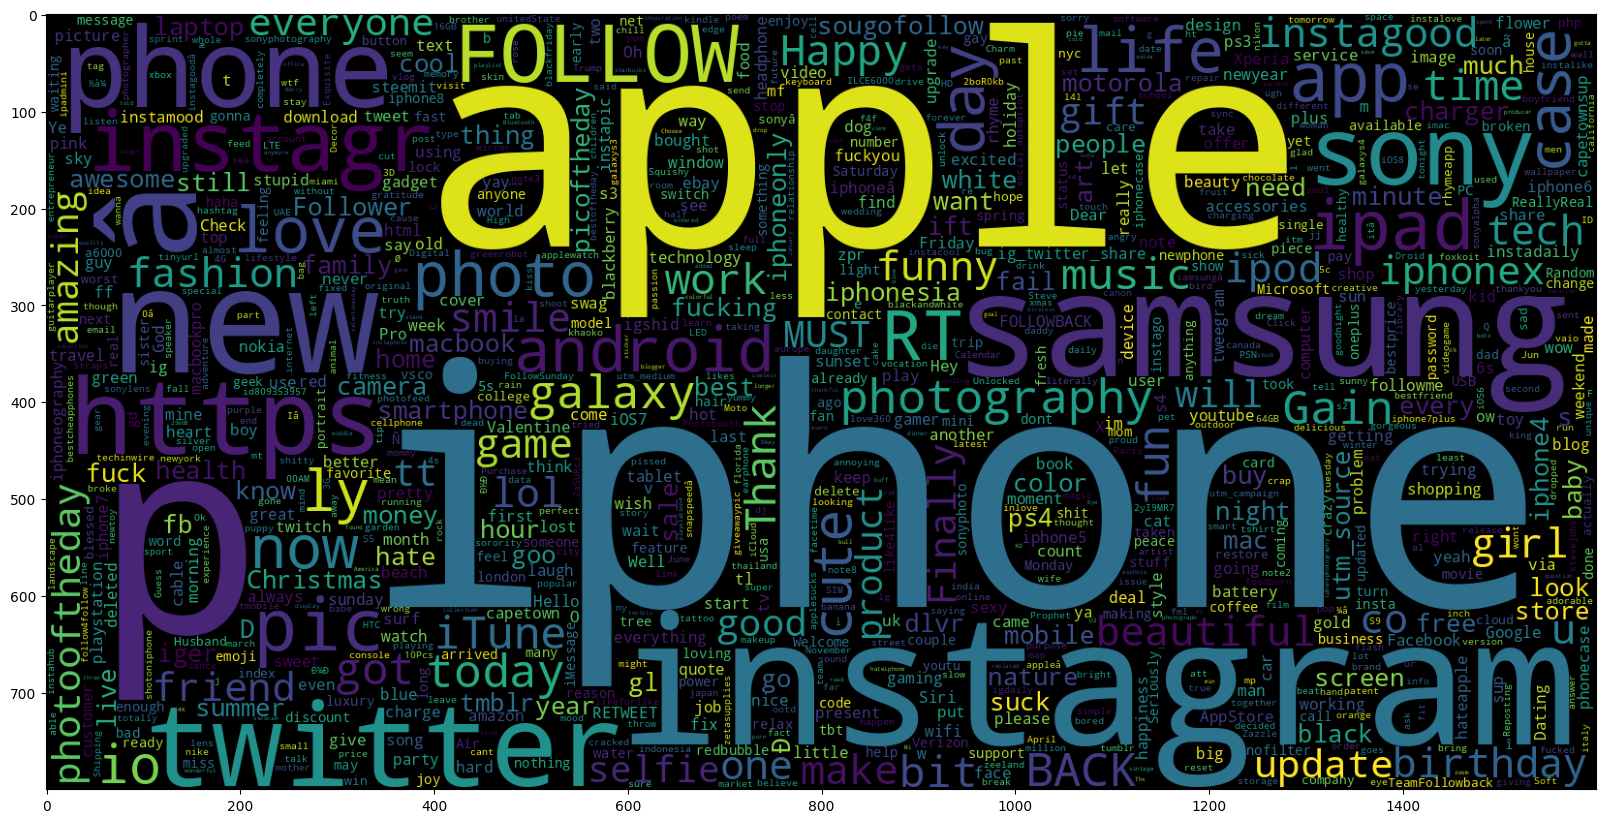

In [52]:
data_neg = data['tweet'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

In [55]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

In [ ]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [ ]:
def model_Evaluate(model):
# Predict values for Test dataset

y_pred = model.predict(X_test)
# Print the evaluation metrics for the dataset.
print(classification_report(y_test, y_pred))
# Compute and plot the Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
categories = ['Negative','Positive']
group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
xticklabels = categories, yticklabels = categories)
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [ ]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [ ]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()